Assignment 2 - Classification

In [1]:
# import Pkg; Pkg.add("MLJ")
# import Pkg; Pkg.add("DataFrames")
# import Pkg; Pkg.add("Tables")
# import Pkg; Pkg.add("CategoricalArrays")
using MLJ, CSV, DataFrames, Tables, CategoricalArrays
df_train = CSV.read("mitbih_train.csv", DataFrame, header=0)
df_test = CSV.read("mitbih_test.csv", DataFrame, header=0)
df = vcat(df_train,df_test)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.0857843
2,0.960114,0.863248,0.461538,0.196581,0.0940171,0.125356,0.0997151,0.0883191
3,1.0,0.659459,0.186486,0.0702703,0.0702703,0.0594595,0.0567568,0.0432432
4,0.925414,0.665746,0.541436,0.276243,0.196133,0.0773481,0.0718232,0.0607735
5,0.967136,1.0,0.830986,0.586854,0.356808,0.248826,0.14554,0.0892019
6,0.927461,1.0,0.626943,0.193437,0.0949914,0.0725389,0.0431779,0.0535406
7,0.423611,0.791667,1.0,0.256944,0.0,0.277778,0.465278,0.520833
8,0.716814,0.539823,0.283186,0.129794,0.0648968,0.0766962,0.0265487,0.0324484
9,0.874214,0.849057,0.480084,0.0587002,0.0901468,0.310273,0.387841,0.385744


Extract equal number of samples by class in training dataset to balance the data

In [17]:
# import Pkg; Pkg.add("StatsBase")
using StatsBase

#extract all data by class
df_train_0 = df_train[df_train[:,188] .== 0.0, :]
df_train_1 = df_train[df_train[:,188] .== 1.0, :]
df_train_2 = df_train[df_train[:,188] .== 2.0, :]
df_train_3 = df_train[df_train[:,188] .== 3.0, :]
df_train_4 = df_train[df_train[:,188] .== 4.0, :]

#combine classes 0, 3 and 4 into one class 
df_train_034 = vcat(df_train_0, df_train_3, df_train_4)

#update classification of Classes 3 & 4 to 0
replace!(df_train_034.Column188, 3.0 => 0)
replace!(df_train_034.Column188, 4.0 => 0)
replace!(df_test.Column188, 3.0 => 0)
replace!(df_test.Column188, 4.0 => 0)

#extract sample data by class and retrieve index
sample_train_0_index= sample(1:nrow(df_train_034), 10000)
sample_train_1_index = sample(1:nrow(df_train_1), 10000)
sample_train_2_index = sample(1:nrow(df_train_2), 10000)

#create sampled dataframe by class 
df_sample_train_0 = df_train_034[sample_train_0_index,:]
df_sample_train_1 = df_train_1[sample_train_1_index,:]
df_sample_train_2 = df_train_2[sample_train_2_index,:]

#concatenate all sampled classes into one dataframe
df_sample_train = vcat(df_sample_train_0, df_sample_train_1 ,df_sample_train_2)

#concatenate training and test data into one dataframe
df_sample = vcat(df_sample_train, df_test)


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.860955,0.796348,0.72191,0.655899,0.587079,0.518258,0.433989,0.328652
2,0.863636,0.42803,0.458333,0.492424,0.503788,0.496212,0.503788,0.496212
3,1.0,0.961089,0.764591,0.57393,0.348249,0.143969,0.0214008,0.0
4,1.0,0.901961,0.568627,0.315904,0.246187,0.230937,0.228758,0.156863
5,1.0,0.905263,0.5,0.181579,0.107895,0.1,0.0578947,0.0263158
6,1.0,0.476596,0.506383,0.52766,0.561702,0.53617,0.544681,0.553191
7,0.613065,0.526382,0.43593,0.339196,0.244975,0.140704,0.0778894,0.0226131
8,0.232258,0.503226,0.787097,0.277419,0.0,0.206452,0.516129,0.56129
9,0.974048,0.813149,0.221453,0.0,0.1609,0.228374,0.252595,0.285467


Training dataset is now balanced with equal number of samples per class

In [18]:
sample_count_train = combine(groupby(df_sample_train, [188]), nrow => :count)

,Column188,count
,Float64,Int64
1,0.0,10000
2,1.0,10000
3,2.0,10000


In [19]:
sample_count_test = combine(groupby(df_test, [188]), nrow => :count)

,Column188,count
,Float64,Int64
1,0.0,19888
2,1.0,556
3,2.0,1448


Unpack data

In [20]:
y, X = unpack(df_sample, ==(:Column188))
X1 = Tables.columntable(X)
y = categorical(y)

51892-element CategoricalArray{Float64,1,UInt32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### KNN

In [21]:
# import Pkg; Pkg.add("NearestNeighborModels")
using NearestNeighborModels

Wrap parameters in a model and create a machine using the model and data

In [27]:
knn = KNNClassifier(K=3)
mach_knn = machine(knn, X1, y)

untrained Machine; caches model-specific representations of data
  model: KNNClassifier(K = 3, …)
  args: 
    1:	Source @289 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @856 ⏎ AbstractVector{Multiclass{3}}


Fit and evaluate the performance of the model using a 10-fold cross-validation

In [28]:
eval_knn=evaluate!(mach_knn, rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:49

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:43

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:37

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:31

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:24

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:18

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:12

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:06

Evaluating over 10 folds: 100%[=========================] Time: 0:00:57


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.965       │ 0.00184 │ [0.962, 0.966, 0.967, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


Use the trained model to predict the test data and measure the accuracy

In [29]:
test_results=Dict(); # create a dict to collect all the test results from the various models
yhat = predict_mode(mach_knn, rows=30001:51892)
test_results["acc_knn"] =accuracy(yhat, y[30001:51892])

0.9228028503562945

Generate the confusion matrix

In [26]:
ConfusionMatrix()(yhat, y[30001:51892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     0.0     │     1.0     │     2.0     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     0.0     │    17978    │     61      │     34      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     1.0     │    1313     │     471     │     26      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     2.0     │     597     │     24      │    1388     │
└─────────────┴─────────────┴─────────────┴─────────────┘


Plot out an accuracy run-chart for classifiers using different k's between 1 to 5.  

┌ Info: Training machine(KNNClassifier(K = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(KNNClassifier(K = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


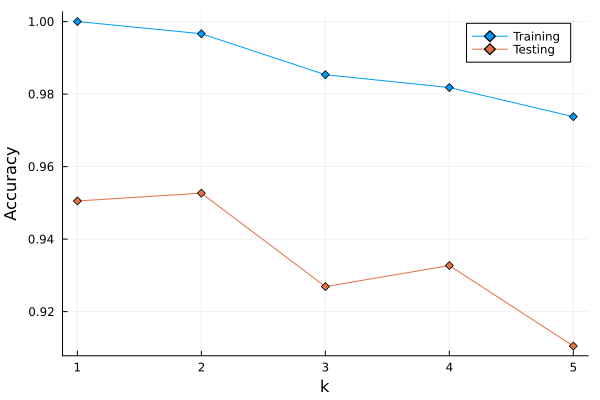

In [30]:
# import Pkg; Pkg.add("Plots")
using Plots
train=[]
test=[]
for i in 1:5
    knnc = KNNClassifier(K=i)
    knnc_mach = machine(knnc, X1, y) 
    MLJ.fit!(knnc_mach, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:5,train,xlab="k",ylab="Accuracy", marker=:d, label="Training")
plot!(1:5,test,xlab="k",ylab="Accuracy", marker=:d, label="Testing")

Using the distance-weighted voting scheme for kNN

┌ Info: Training machine(KNNClassifier(K = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(KNNClassifier(K = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


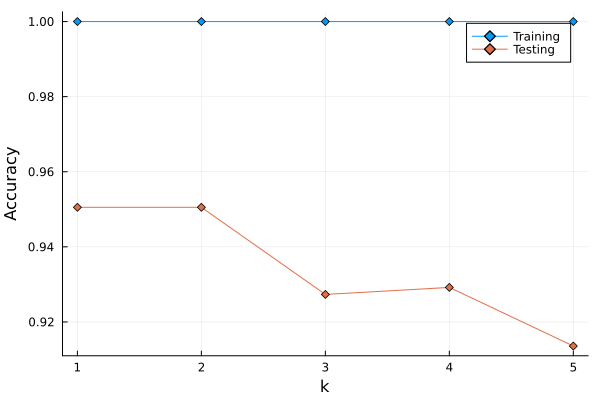

In [31]:
train=[]
test=[]
for i in 1:5
    knnc = KNNClassifier(K=i,weights = Inverse())
    knnc_mach = machine(knnc, X1, y) 
    MLJ.fit!(knnc_mach, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(knnc_mach, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end
plot(1:5,train,xlab="k",ylab="Accuracy", marker=:d, label="Training")
plot!(1:5,test,xlab="k",ylab="Accuracy", marker=:d, label="Testing")

Not much improvement based on above plot...

### Decision Tree

In [32]:
Tree = @load DecisionTreeClassifier pkg=DecisionTree
tree = Tree()

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


import MLJDecisionTreeInterface ✔

DecisionTreeClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  feature_importance = :impurity, 
  rng = Random._GLOBAL_RNG())

In [33]:
using Random
Random.seed!(1234);
mach_tree = machine(tree, X1, y)

untrained Machine; caches model-specific representations of data
  model: DecisionTreeClassifier(max_depth = -1, …)
  args: 
    1:	Source @579 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @496 ⏎ AbstractVector{Multiclass{3}}


In [34]:
eval_tree=evaluate!(mach_tree,rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601
Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:46

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:38

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:31

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:25

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:20

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:15

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:10

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:05

Evaluating over 10 folds: 100%[=========================] Time: 0:00:48


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.967       │ 0.00263 │ [0.966, 0.973, 0.973, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [35]:
yhat = predict_mode(mach_tree, rows=30001:51892)
test_results["acc_tree"] = accuracy(yhat, y[30001:51892])

0.915722638406724

In [36]:
ConfusionMatrix()(yhat, y[30001:51892]) # Generate the Confusion Matrix

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     0.0     │     1.0     │     2.0     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     0.0     │    18295    │     124     │     95      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     1.0     │     860     │     417     │     18      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     2.0     │     733     │     15      │    1335     │
└─────────────┴─────────────┴─────────────┴─────────────┘


In [37]:
report(mach_tree).print_tree() # Print the decision tree

Feature 4 < 0.09697 ?
├─ Feature 37 < 0.5056 ?
    ├─ Feature 62 < 0.008243 ?
        ├─ Feature 5 < 0.1616 ?
            ├─ Feature 35 < 0.2778 ?
                ├─ 
                └─ 
            └─ Feature 43 < 0.05155 ?
                ├─ 1 : 2/2
                └─ 
        └─ Feature 1 < 0.8547 ?
            ├─ Feature 1 < 0.627 ?
                ├─ 
                └─ 
            └─ Feature 25 < 0.3126 ?
                ├─ 
                └─ 
    └─ Feature 1 < 0.6885 ?
        ├─ Feature 3 < 0.4623 ?
            ├─ Feature 31 < 0.4909 ?
                ├─ 
                └─ 
            └─ 1 : 33/33
        └─ Feature 3 < 0.4035 ?
            ├─ Feature 14 < 0.2252 ?
                ├─ 
                └─ 
            └─ Feature 37 < 0.5778 ?
                ├─ 1 : 29/29
                └─ 
└─ Feature 58 < 0.1829 ?
    ├─ Feature 1 < 0.7797 ?
        ├─ Feature 67 < 0.001961 ?
            ├─ Feature 16 < 0.4153 ?
                ├─ 
                └─ 
            └─ Feature

Plot out a run-chart for both training and testing accuracies with max_depth ranged from 1 to 10  

┌ Info: Training machine(DecisionTreeClassifier(max_depth = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 6, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 7, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 8, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 9, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 10, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 11, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 12, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 13, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 14, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 15, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 16, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 17, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 18, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 19, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


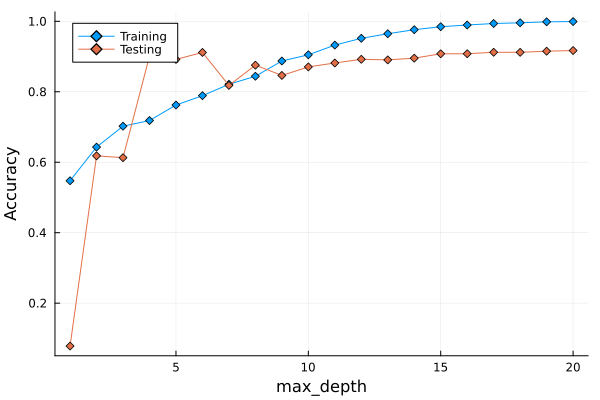

In [39]:
using Plots
train=[]
test=[]
for i in 1:20
    tree = Tree(max_depth=i)
    mach_tree = machine(tree, X1, y)
    fit!(mach_tree, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(mach_tree, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(mach_tree, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="max_depth",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="max_depth",ylab="Accuracy", marker=:d, label="Testing")

┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


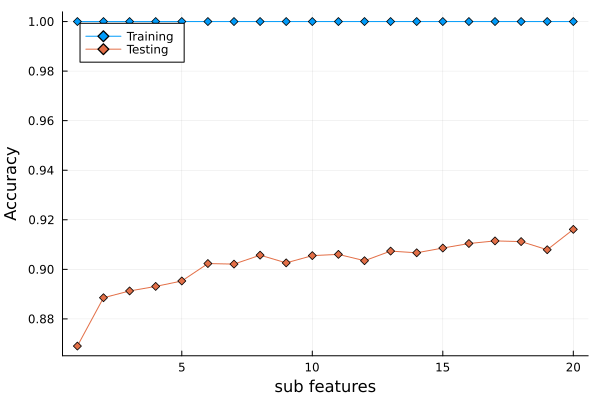

In [40]:
train=[]
test=[]
for i in 1:20
    tree = Tree(n_subfeatures=i)
    mach_tree = machine(tree, X1, y)
    fit!(mach_tree, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(mach_tree, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(mach_tree, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="sub features",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="sub features",ylab="Accuracy", marker=:d, label="Testing")

Rerunning the model to use the best max depth and # of sub-features from the plots above to see if we get a better accuracy

In [41]:
Random.seed!(1234);
tree.max_depth = 15
tree.n_subfeatures = 20
mach_tree = machine(tree, X1, y)
eval_tree=evaluate!(mach_tree,rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:05

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:04

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:04

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:03

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:02

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:02

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:01

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:01

Evaluating over 10 folds: 100%[=========================] Time: 0:00:05


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.949       │ 0.00554 │ [0.948, 0.959, 0.96, 0.9 ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [42]:
yhat = predict_mode(mach_tree, rows=30001:51892)
test_results["acc_tree"] = accuracy(yhat, y[30001:51892])

0.8932029965284122

### SVM

In [97]:
# import Pkg; Pkg.add("MLJLIBSVMInterface")
# import Pkg; Pkg.add("LIBSVM")

   Resolving package versions...

  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\carlo\.julia\environments\v1.8\Manifest.toml`


In [43]:
SVC = @load SVC pkg=LIBSVM

import MLJLIBSVMInterface

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


 ✔


MLJLIBSVMInterface.SVC

Specify the kernel type and degree

In [44]:
@load SVC pkg=LIBSVM; 
using LIBSVM

svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(5))

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


import MLJLIBSVMInterface ✔


SVC(
  kernel = LIBSVM.Kernel.Polynomial, 
  gamma = 0.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 5, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = false)

In [45]:
mach_svm = machine(svc_model, X1, y)

eval_svm=evaluate!(mach_svm,rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:14:41

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:12:51

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:11:01

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:09:11

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:07:21

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:05:30

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:03:40

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:01:51

Evaluating over 10 folds: 100%[=========================] Time: 0:18:25


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬───────────┬─────────────┬─────────┬──────────────────────────────
│ measure    │ operation │ measurement │ 1.96*SE │ per_fold                    ⋯
├────────────┼───────────┼─────────────┼─────────┼──────────────────────────────
│ Accuracy() │ predict   │ 0.905       │ 0.00254 │ [0.896, 0.904, 0.904, 0.908 ⋯
└────────────┴───────────┴─────────────┴─────────┴──────────────────────────────
                                                                1 column omitted


In [46]:
yhat = MLJ.predict(mach_svm, rows=30001:51892)
test_results["acc_svm"] = accuracy(yhat, y[30001:51892])

0.9432212680431208

In [47]:
ConfusionMatrix()(yhat, y[30001:51892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     0.0     │     1.0     │     2.0     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     0.0     │    18915    │     149     │     95      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     1.0     │     489     │     396     │     15      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     2.0     │     484     │     11      │    1338     │
└─────────────┴─────────────┴─────────────┴─────────────┘


Generate a run chart (accuracy vs. degree) with the polynomial kernel degree varying from 1 to 10

┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496
┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


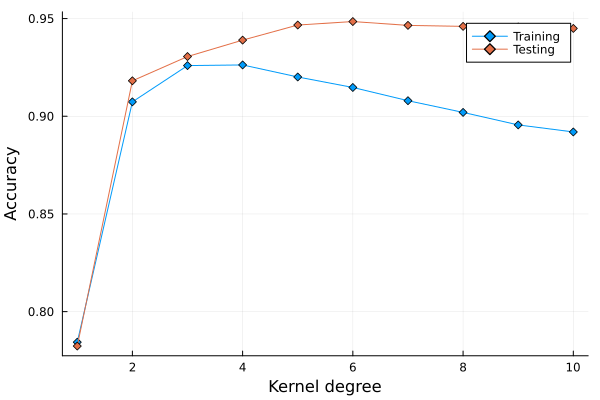

In [58]:
train=[]
test=[]
for i in 1:10
    svcmodel = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(i));
    svcmach = machine(svcmodel, X1, y)
    fit!(svcmach, rows=1:30000)
    tr_acc = accuracy(MLJ.predict(svcmach, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict(svcmach, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:10,train,xlab="Kernel degree",ylab="Accuracy", marker=:d, label="Training")
plot!(1:10,test,xlab="Kernel degree",ylab="Accuracy", marker=:d, label="Testing")

Adding a cost function with the best kernel degree from above (i.e. 4)

┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(SVC(kernel = Polynomial, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


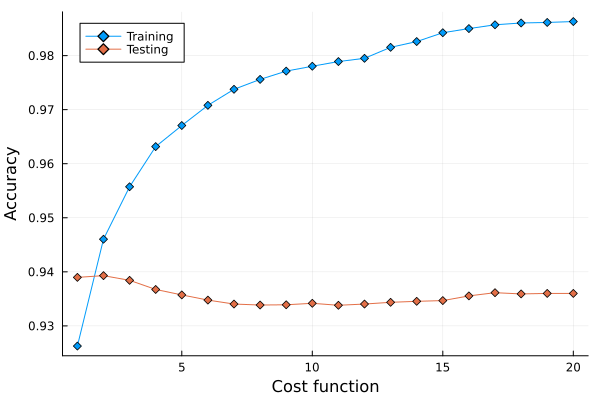

In [59]:
train=[]
test=[]
for i in 1:20
    svcmodel = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(4), cost=Float64(i));
    svcmach = machine(svcmodel, X1, y)
    fit!(svcmach, rows=1:30000)
    tr_acc = accuracy(MLJ.predict(svcmach, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict(svcmach, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="Cost function",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="Cost function",ylab="Accuracy", marker=:d, label="Testing")

Re-run the model to use the best kernel degree and cost function.

In [60]:
svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(4), cost=Float64(2));
mach_svm = machine(svc_model, X1, y)
eval_svm=evaluate!(mach_svm,rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:13:35

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:12:02

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:10:20

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:08:33

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:06:49

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:05:06

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:03:23

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:01:41

Evaluating over 10 folds: 100%[=========================] Time: 0:16:51


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬───────────┬─────────────┬─────────┬──────────────────────────────
│ measure    │ operation │ measurement │ 1.96*SE │ per_fold                    ⋯
├────────────┼───────────┼─────────────┼─────────┼──────────────────────────────
│ Accuracy() │ predict   │ 0.929       │ 0.00239 │ [0.926, 0.937, 0.93, 0.93,  ⋯
└────────────┴───────────┴─────────────┴─────────┴──────────────────────────────
                                                                1 column omitted


In [61]:
yhat = MLJ.predict(mach_svm, rows=30001:51892)
test_results["acc_svm"] = accuracy(yhat, y[30001:51892])

0.9372373469760643

Much better accuracy after tuning the parameters...

### Random Forest

In [48]:
using Random
Random.seed!(1234);
RandomForestClassifier = @load RandomForestClassifier pkg="DecisionTree"
rf = RandomForestClassifier()
mach_rf = machine(rf, X1, y)


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


import MLJDecisionTreeInterface ✔

untrained Machine; caches model-specific representations of data
  model: RandomForestClassifier(max_depth = -1, …)
  args: 
    1:	Source @102 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @720 ⏎ AbstractVector{Multiclass{3}}


In [49]:
MLJ.params(rf)

(max_depth = -1,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_purity_increase = 0.0,
 n_subfeatures = -1,
 n_trees = 10,
 sampling_fraction = 0.7,
 feature_importance = :impurity,
 rng = Random._GLOBAL_RNG(),)

In [50]:
eval_rf=evaluate!(mach_rf, rows=1:30000,resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:22

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:18

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:15

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:12

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:09

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:07

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:04

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:02

Evaluating over 10 folds: 100%[=========================] Time: 0:00:22


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.964       │ 0.00341 │ [0.962, 0.963, 0.968, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [51]:
yhat = predict_mode(mach_rf, rows=30001:51892)
test_results["acc_rf"] = accuracy(yhat, y[30001:51892])

0.944865704366892

In [52]:
ConfusionMatrix()(yhat, y[30001:51892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     0.0     │     1.0     │     2.0     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     0.0     │    18922    │     126     │     92      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     1.0     │     576     │     425     │     18      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     2.0     │     390     │      5      │    1338     │
└─────────────┴─────────────┴─────────────┴─────────────┘


Plot accuracy run chart with max depth from 1 to 15

┌ Info: Training machine(RandomForestClassifier(max_depth = 1, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 2, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 3, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 4, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 5, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 6, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 7, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 8, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 9, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 10, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 11, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 12, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 13, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 14, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 15, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 16, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 17, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 18, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 19, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


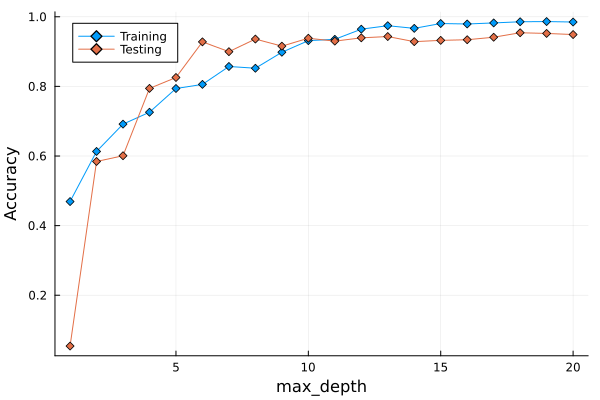

In [62]:
train=[]
test=[]
for i in 1:20
    rf = RandomForestClassifier(max_depth=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="max_depth",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="max_depth",ylab="Accuracy", marker=:d, label="Testing")

Plot accuracy run chart with sub features from 1 to 15

┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


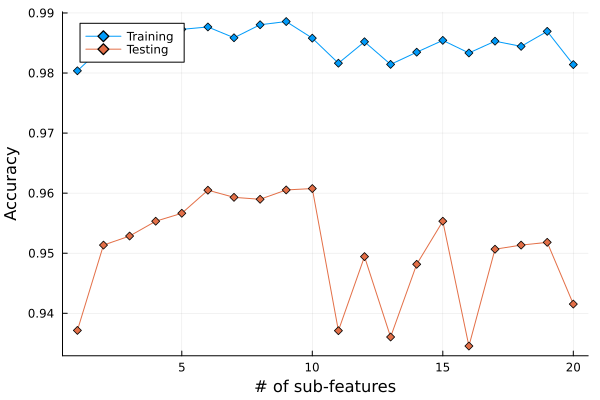

In [63]:
train=[]
test=[]
for i in 1:20
    rf = RandomForestClassifier(max_depth=20, n_subfeatures=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:20,train,xlab="# of sub-features",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:20,test,xlab="# of sub-features",ylab="Accuracy", marker=:d, label="Testing")

Plot accuracy run chart with increasing number of trees

┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


┌ Info: Training machine(RandomForestClassifier(max_depth = 20, …), …).
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\machines.jl:496


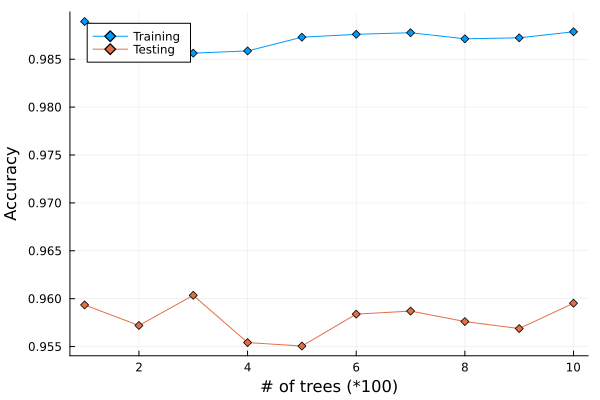

In [64]:
train=[]
test=[]
for i=100:100:1000
    rf = RandomForestClassifier(max_depth=20, n_subfeatures=10, n_trees=i)
    mach_rf = machine(rf, X1, y)
    fit!(mach_rf, rows=1:30000)
    tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:30000), y[1:30000])
    te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=30001:51892), y[30001:51892])
    push!(train, tr_acc)
    push!(test, te_acc)
end

plot(1:10,train,xlab="# of trees (*100)",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
plot!(1:10,test,xlab="# of trees (*100)",ylab="Accuracy", marker=:d, label="Testing")

Re-run model with best max depth, sub-features and number of trees

In [65]:
rf = RandomForestClassifier(max_depth=20, n_subfeatures=10, n_trees=300)
mach_rf = machine(rf, X1, y)
eval_rf=evaluate!(mach_rf, rows=1:30000,resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:05:36

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:04:52

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:04:10

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:03:29

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:02:47

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:02:05

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:01:23

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:42

Evaluating over 10 folds: 100%[=========================] Time: 0:06:58


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.97        │ 0.00172 │ [0.963, 0.971, 0.969, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [66]:
yhat = predict_mode(mach_rf, rows=30001:51892)
test_results["acc_rf"] = accuracy(yhat, y[30001:51892])

0.9521286314635483

Accuracy has slightly improved... check Confusion Matrix

In [68]:
ConfusionMatrix()(yhat, y[30001:51892])

┌ Warning: The classes are un-ordered,
│ using order: [0.0, 1.0, 2.0].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\measures\confusion_matrix.jl:122


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     0.0     │     1.0     │     2.0     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     0.0     │    19030    │     102     │     68      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     1.0     │     499     │     443     │      9      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     2.0     │     359     │     11      │    1371     │
└─────────────┴─────────────┴─────────────┴─────────────┘


In [51]:
# train=[]
# test=[]
# for i=0.1:0.1:0.9
#     rf = RandomForestClassifier(max_depth=14, n_subfeatures=7, n_trees=900, sampling_fraction=i)
#     mach_rf = machine(rf, X1, y)
#     fit!(mach_rf, rows=1:10000)
#     tr_acc = accuracy(MLJ.predict_mode(mach_rf, rows=1:10000), y[1:10000])
#     te_acc = accuracy(MLJ.predict_mode(mach_rf, rows=10001:15000), y[10001:15000])
#     push!(train, tr_acc)
#     push!(test, te_acc)
# end

# plot(1:10,train,xlab="Sampling fraction",ylab="Accuracy", marker=:d, label="Training", legend=:topleft)
# plot!(1:10,test,xlab="Sampling fraction",ylab="Accuracy", marker=:d, label="Testing")

### Linear Discriminant Analysis (LDA)

In [53]:
Random.seed!(1234);
model_lda=@load LDA
lda = model_lda()
mach_lda=machine(lda, X, y)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\carlo\.julia\packages\MLJModels\GlOTy\src\loading.jl:159


import MLJMultivariateStatsInterface

 ✔


untrained Machine; caches model-specific representations of data
  model: LDA(method = gevd, …)
  args: 
    1:	Source @126 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @030 ⏎ AbstractVector{Multiclass{3}}


In [54]:
eval_lda = evaluate!(mach_lda, rows=1:30000, resampling=CV(nfolds=10,shuffle=true,rng=42), measure=accuracy,operation=predict_mode)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\carlo\.julia\packages\MLJBase\CtxrQ\src\resampling.jl:601


Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:20

Evaluating over 10 folds:  30%[=======>                 ]  ETA: 0:00:12

Evaluating over 10 folds:  40%[==========>              ]  ETA: 0:00:08

Evaluating over 10 folds:  50%[============>            ]  ETA: 0:00:06

Evaluating over 10 folds:  60%[===============>         ]  ETA: 0:00:04

Evaluating over 10 folds:  70%[=================>       ]  ETA: 0:00:03

Evaluating over 10 folds:  80%[====================>    ]  ETA: 0:00:02

Evaluating over 10 folds:  90%[======================>  ]  ETA: 0:00:01

Evaluating over 10 folds: 100%[=========================] Time: 0:00:06


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────┬──────────────┬─────────────┬─────────┬───────────────────────────
│ measure    │ operation    │ measurement │ 1.96*SE │ per_fold                 ⋯
├────────────┼──────────────┼─────────────┼─────────┼───────────────────────────
│ Accuracy() │ predict_mode │ 0.752       │ 0.00378 │ [0.741, 0.755, 0.757, 0. ⋯
└────────────┴──────────────┴─────────────┴─────────┴───────────────────────────
                                                                1 column omitted


In [55]:
yhat = predict_mode(mach_lda, rows=30001:51892)
test_results["acc_lda"] = accuracy(yhat, y[30001:51892])

0.7169285583774895

Collect all the accuracy calculated in the cross-validation and create a visualization presenting the average and standard deviations of the 10 results for each model

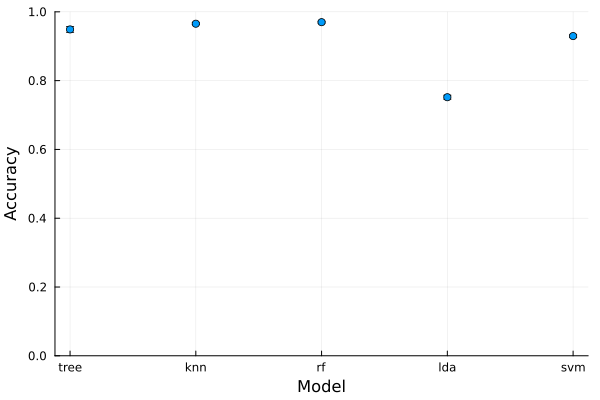

In [69]:
results= [eval_tree.measurement[1], eval_knn.measurement[1],eval_rf.measurement[1],eval_lda.measurement[1],eval_svm.measurement[1]];
errors=[std(eval_tree.per_fold[1]),std(eval_knn.per_fold[1]),std(eval_rf.per_fold[1]),std(eval_lda.per_fold[1]),std(eval_svm.per_fold[1])]
scatter(["tree", "knn", "rf", "lda", "svm"],results,yerror=errors,ylims=[0,1],label=nothing, xlab="Model", ylab="Accuracy")

Check accuracy of the test set

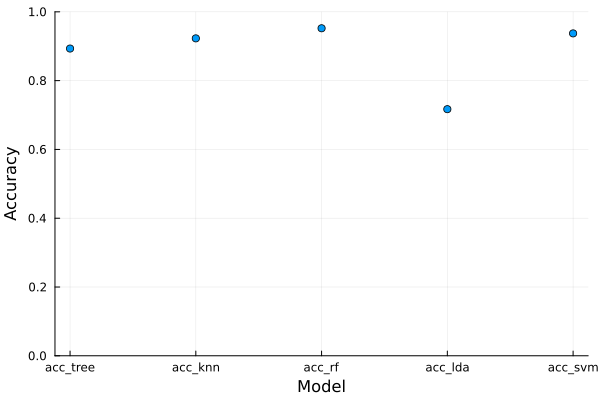

In [70]:
scatter(Array(string.(keys(test_results))),Array(float.(values(test_results))),ylims=[0,1],label=nothing, xlab="Model", ylab="Accuracy")